In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [19]:
final_df = pd.read_csv('final_df.csv')

# Modeling

In [20]:
# Assign the data to independent and dependent variables
X = final_df.drop(['TARGET'],axis=1)
y = final_df['TARGET']

In [21]:
# Split the data into training and testing sets and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [22]:
# Check the shape of the datasets
X_train.shape,X_test.shape

((215257, 259), (92254, 259))

In [23]:
y_train.value_counts()

0.0    197880
1.0     17377
Name: TARGET, dtype: int64

In [24]:
y_test.value_counts()

0.0    84806
1.0     7448
Name: TARGET, dtype: int64

## Boosting Method

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
gbc = GradientBoostingClassifier(random_state=2)
params = {'learning_rate':np.arange(0.1,1.2,0.3)}

In [14]:
grid = GridSearchCV(gbc,params,cv=3,scoring= 'roc_auc',verbose = 1,n_jobs=-1)

In [15]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=2),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.4, 0.7, 1. ])},
             scoring='roc_auc', verbose=1)

In [16]:
best_est = grid.best_estimator_
best_est

GradientBoostingClassifier(learning_rate=0.4, random_state=2)

In [29]:
gbc = GradientBoostingClassifier(random_state=2,learning_rate=0.4,verbose=5)

In [18]:
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train)# rbose=1 to show the progress of the GridSearchCV object

0.922018796136711

In [19]:
y_pred = gbc.predict(X_test)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84806
         1.0       0.48      0.03      0.06      7448

    accuracy                           0.92     92254
   macro avg       0.70      0.52      0.51     92254
weighted avg       0.89      0.92      0.89     92254



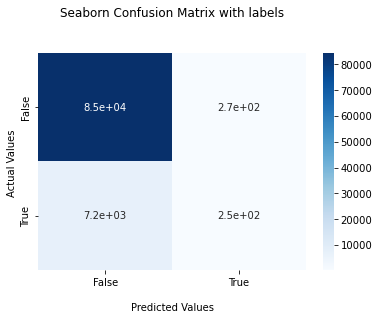

In [21]:
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [44]:
import joblib

In [64]:
filename = 'GradientBoost_model.sav'
joblib.dump(gbc, filename)

['GradientBoost_model.sav']

## Imbalanced Problem

## Resampling to combat with imbalanced distribution of target column

In [78]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpip
from imblearn.under_sampling import RandomUnderSampler

In [79]:
# define pipeline
steps = [('over', SMOTE()), ('gbc', gbc)]
pipeline = imbpip(steps=steps)

In [81]:
pipeline.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2074           20.82m
         2           1.0593           20.62m
         3           0.9280           20.36m
         4           0.8585           20.14m
         5           0.7703           19.96m
         6           0.7284           19.75m
         7           0.6597           19.51m
         8           0.6163           19.30m
         9           0.5913           19.10m
        10           0.5600           18.91m
        11           0.5454           18.70m
        12           0.5192           18.48m
        13           0.4989           18.27m
        14           0.4743           18.06m
        15           0.4645           17.85m
        16           0.4389           17.64m
        17           0.4223           17.42m
        18           0.4136           17.21m
        19           0.4059           17.01m
        20           0.3889           16.78m
        21           0.3797           16.58m
        2

Pipeline(steps=[('over', SMOTE()),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.4, random_state=2,
                                            verbose=5))])

In [82]:
pipeline

Pipeline(steps=[('over', SMOTE()),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.4, random_state=2,
                                            verbose=5))])

In [83]:
filename = 'GradientBoost_model_smote.sav'
joblib.dump(pipeline, filename)

['GradientBoost_model_smote.sav']

In [32]:
y_pred = pipeline.predict(X_test)

In [35]:
cf_matrix = confusion_matrix(y_pred,y_test)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84806
         1.0       0.44      0.03      0.06      7448

    accuracy                           0.92     92254
   macro avg       0.68      0.51      0.51     92254
weighted avg       0.88      0.92      0.88     92254



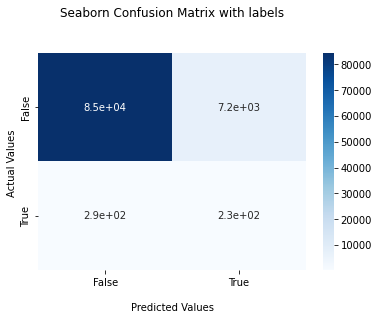

In [37]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [84]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), (('gbc', gbc))]
pipeline = imbpip(steps=steps)

In [85]:
pipeline.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1896            2.12m
         2           1.1541            2.09m
         3           1.1317            2.07m
         4           1.1145            2.05m
         5           1.1045            2.03m
         6           1.0966            2.01m
         7           1.0818            1.98m
         8           1.0700            1.96m
         9           1.0632            1.94m
        10           1.0583            1.92m
        11           1.0514            1.90m
        12           1.0471            1.88m
        13           1.0433            1.86m
        14           1.0402            1.83m
        15           1.0344            1.81m
        16           1.0315            1.79m
        17           1.0292            1.77m
        18           1.0256            1.75m
        19           1.0234            1.72m
        20           1.0215            1.70m
        21           1.0192            1.68m
        2

Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.4, random_state=2,
                                            verbose=5))])

In [86]:
filename = 'GradientBoost_model_smote_under.sav'
joblib.dump(pipeline, filename)

['GradientBoost_model_smote_under.sav']

In [42]:
y_pred = pipeline.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     84806
         1.0       0.25      0.40      0.31      7448

    accuracy                           0.85     92254
   macro avg       0.60      0.65      0.61     92254
weighted avg       0.89      0.85      0.87     92254



In [46]:
cf_matrix = confusion_matrix(y_test,y_pred)

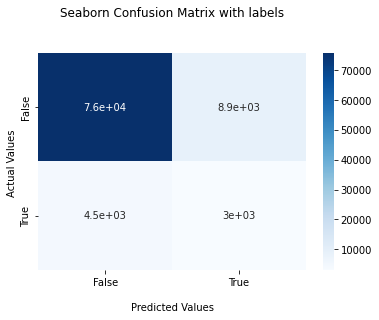

In [47]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()